In [1]:
import numpy as np 
import astropy.constants as c
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#list all the constants used
G=c.G.value
M_sun=c.M_sun.value
M_earth=c.M_earth.value
R_sun=c.R_sun.value
R_earth=c.R_earth.value
hour=3600 #s
day=3600*24
e=0.1
t_LC=1765.5 #s

In [3]:
def delta(Rp, Rs):
    delta = (Rp*R_earth) / (Rs*R_sun)**2*1e6
    return delta

In [4]:
def SNR(delta,n,sigma_s):
    SNR=delta*n**0.5/sigma_s
    return SNR

In [5]:
def sigma_s(t, sigma_LC, cdppindex):
    t_LC=1765.5 

    return sigma_LC*(t/t_LC)**cdppindex

In [6]:
def t_dur(P,Rs,e,a): #hour
    t_dur = P*day*Rs*R_sun*(1-e**2)/(np.pi*a)/hour
    return t_dur

In [7]:
def a(Ms,P):
    a=((G*Ms*M_sun*(P*day)**2)/(4*np.pi**2))**(1/3)
    return a 

In [8]:
def n(t_obs,P): # the unite of t_obs and P is day
    n=t_obs/P
    return n

In [9]:
def f_n(t_obs,P):
    if t_obs <=2*P:
        return 0
    if t_obs> 2*P and t_obs< 3*P:
        return (t_obs/P-2)
    if t_obs>=3*P:
        return 1

In [10]:
def f_eff(SNR):
    if SNR <=6:
        return 0
    if SNR >6 and SNR<=12:
        return (SNR-6)/6
    if SNR>12:
        return 1

In [11]:
def f_geo(Rp,Rs,a,e):
    f_geo = (Rp*R_earth+Rs*R_sun)/(a*(1-e**2))
    return f_geo

In [12]:
#read dispersions in the csv file
dispersions=pd.read_csv('ms_100pc_t_interval_2d.csv',sep=',')
#print(dispersions)

#download data with cdpp 3 6 9 cross match with the dispersions data
#kepler q17

#rewrite the data
kepler_q17=pd.read_csv('kepler_steller_17.csv',sep='|')
os.system('mkdir data')
with open('data/kepler_stellar_q17.csv','w') as f:
    s=['kepid',
       'ra',
       'dec',
       'cdpp3',
       'cdpp6',
       'cdpp12',]
    writer=csv.DictWriter(f,fieldnames=s)
    writer.writeheader()
    for i in range(0,len(kepler_q17)):
        #select the data with cdpp
        if kepler_q17['rrmscdpp03p0'][i]==kepler_q17['rrmscdpp03p0'][i] and kepler_q17['rrmscdpp06p0'][i]==kepler_q17['rrmscdpp06p0'][i] and kepler_q17['rrmscdpp12p0'][i]==kepler_q17['rrmscdpp12p0'][i]:
            writer.writerow({'kepid':kepler_q17['kepid'][i],
                            'ra':kepler_q17['degree_ra'][i],
                            'dec':kepler_q17['degree_dec'][i],
                            'cdpp3':kepler_q17['rrmscdpp03p0'][i],
                            'cdpp6':kepler_q17['rrmscdpp06p0'][i],
                            'cdpp12':kepler_q17['rrmscdpp12p0'][i],})
            

In [10]:
#import pandas as pd
#data = pd.read_csv('data/kepler_stellar_q17.csv',sep=',')
#print(data)
#data = pd.read_csv('data/kepler_stellar_q17_add_dispersions.csv',sep=',')
#count=0
#for i in range(0,len(data)):
#    if data['kepid'][i]==data['kepid.1'][i]:
#        count+=1

#print(count,len(data))

113942 113945


In [14]:
with open('data/kepler_stellar_q17_add_dispersions_reduction.csv','w') as f:
    s=["kepid",
        "ra",
        "dec",
        "cdpp3",
        "cdpp6",
        "cdpp12",
        "std_vra",
        "std_vdec",
        "mean_vra",
        "mean_vdec",
        "sigma_vra",
        "sigma_vdec",
        "kepmag",
        "teff",
        "logg",
        "radius",
        "feh",
        "mass",
        "dens",
        "dist",
        "av",
        "jmag",
        "hmag",
        "kmag",
        "ra_gaia",
        "dec_gaia",
        "parallax",
        "parallax_error",
        "pmra",
        "pmra_error",
        "pmdec",
        "pmdec_error",
        "phot_g_mean_mag",
        "teff_b2018",
        "teffe_b2018",
        "rad_b2018",
        "radep_b2018",
        "radem_b2018",
      ]
    writer=csv.DictWriter(f,fieldnames=s)
    writer.writeheader()
    for i in range(0,len(data)):
        if data['kepid'][i]==data['kepid.1'][i]:
            writer.writerow({"kepid":data['kepid'][i],
                            "ra":data['ra'][i],
                            "dec":data['dec'][i],
                            "cdpp3":data['cdpp3'][i],
                            "cdpp6":data['cdpp6'][i],
                            "cdpp12":data['cdpp12'][i],
                            "std_vra":data['std_vra'][i],
                            "std_vdec":data['std_vdec'][i],
                            "mean_vra":data['mean_vra'][i],
                            "mean_vdec":data['mean_vdec'][i],
                            "sigma_vra":data['sigma_vra'][i],
                            "sigma_vdec":data['sigma_vdec'][i],
                            "kepmag":data['kepmag'][i],
                            "teff":data['teff'][i],
                            "logg":data['logg'][i],
                            "feh":data['feh'][i],
                            "radius":data['radius'][i],
                            "mass":data['mass'][i],
                            "dens":data['dens'][i],
                            "dist":data['dist'][i],
                            "av":data['av'][i],
                            "jmag":data['jmag'][i],
                            "hmag":data['hmag'][i],
                            "kmag":data['kmag'][i],
                            "ra_gaia":data['ra_gaia'][i],
                            "dec_gaia":data['dec_gaia'][i],
                            "parallax":data['parallax'][i],
                            "parallax_error":data['parallax_error'][i],
                            "pmra":data['pmra'][i],
                            "pmra_error":data['pmra_error'][i],
                            "pmdec":data['pmdec'][i],
                            "pmdec_error":data['pmdec_error'][i],
                            "phot_g_mean_mag":data['phot_g_mean_mag'][i],
                            "teff_b2018":data['teff_b2018'][i],
                            "teffe_b2018":data['teffe_b2018'][i],
                            "rad_b2018":data['rad_b2018'][i],
                            "radep_b2018":data['radep_b2018'][i],
                            "radem_b2018":data['radem_b2018'][i],
                            })
            
    


In [13]:
#import pandas as pd
#data = pd.read_csv('data/kepler_stellar_q17.csv',sep=',')
#print(data)
count=0
data = pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction.csv',sep=',')
for i in range(0,len(data)):
    if data['kepid'][i]==data['kepid.1'][i]:
        count+=1
print(count,len(data))

4744 4744


61780662894.614716 6.928523894658733 2.135


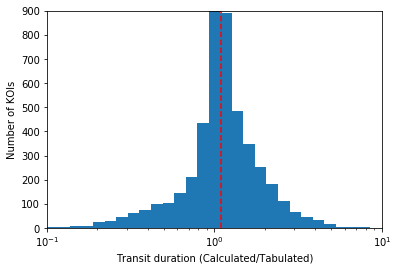

In [14]:
# calculate t_dur compared with the tabulate value

data = pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction.csv',sep=',')
a_calculate=[]
tdur_calculate=[]
for i in range(0,len(data)):
    a_temp=a(data['mass'][i],data['koi_period'][i])
    tdur_temp=t_dur(data['koi_period'][i],data['rad_b2018'][i],e,a_temp)
    a_calculate.append(a_temp)
    tdur_calculate.append(tdur_temp)

print(a_calculate[0],tdur_calculate[0],data['koi_duration'][0])
tdur_ratio=[]
for i in range(0,len(data)):
    tdur_ratio.append(tdur_calculate[i]/data['koi_duration'][i])

fig=plt.figure()
bins=np.logspace(-1,1,30,base=10)
plt.hist(tdur_ratio,bins=bins)
plt.xlabel('Transit duration (Calculated/Tabulated)')
plt.ylabel('Number of KOIs')
plt.xlim(0.1,10)
plt.ylim(0,900)
y=np.linspace(0,900,1000)
x=np.linspace(np.median(tdur_ratio),np.median(tdur_ratio),1000)
plt.xscale('log')
os.system('mkdir result')
plt.plot(x,y,'r--')
plt.savefig('result/tdur_ratio.eps')
plt.show()

In [1]:
from astropy.time import Time
from datetime import datetime

q1_start=Time(datetime(2009, 5, 2, 0, 54, 56))
q1_end=Time(datetime(2009, 5, 11, 17, 51, 31))
q1=q1_end-q1_start

q2_start=Time(datetime(2009, 5, 13, 0, 15, 50))
q2_end=Time(datetime(2009, 6, 15, 11, 32, 58))
q2=q2_end-q2_start

q3_start=Time(datetime(2009, 6, 20, 0, 25, 10))
q3_end=Time(datetime(2009, 9, 16, 23, 9, 29))
q3=q3_end-q3_start

q4_start=Time(datetime(2009, 9, 18, 17, 19, 59))
q4_end=Time(datetime(2009, 12, 16, 23, 55, 6))
q4=q4_end-q4_start

q5_start=Time(datetime(2009, 12, 19, 21, 3, 56))
q5_end=Time(datetime(2010, 3, 19, 16, 53, 32))
q5=q5_end-q5_start

q6_start=Time(datetime(2010, 3, 20, 23, 47, 16))
q6_end=Time(datetime(2010, 6, 23, 15, 50, 27))
q6=q6_end-q6_start

q7_start=Time(datetime(2010, 6, 24, 22, 44, 9))
q7_end=Time(datetime(2010, 9, 22, 19, 3, 10))
q7=q7_end-q7_start

q8_start=Time(datetime(2010, 9, 23, 16, 8, 24))
q8_end=Time(datetime(2010, 12, 22, 1, 10, 42))
q8=q8_end-q8_start

q9_start=Time(datetime(2011, 1, 6, 20, 45, 9))
q9_end=Time(datetime(2011, 3, 14, 20, 18, 16))
q9=q9_end-q9_start

q10_start=Time(datetime(2011, 3, 21, 0, 24, 25))
q10_end=Time(datetime(2011, 6, 26, 10, 10, 30))
q10=q10_end-q10_start

q11_start=Time(datetime(2011, 6, 27, 8, 14, 33))
q11_end=Time(datetime(2011, 9, 28, 18, 22, 51))
q11=q11_end-q11_start

q12_start=Time(datetime(2011, 9, 29, 16, 56, 20))
q12_end=Time(datetime(2012, 1, 4, 19, 50, 26))
q12=q12_end-q12_start

q13_start=Time(datetime(2012, 1, 5, 21, 49, 55))
q13_end=Time(datetime(2012, 3, 28, 12, 32, 44))
q13=q13_end-q13_start

q14_start=Time(datetime(2012, 3, 29, 5, 42, 32))
q14_end=Time(datetime(2012, 6, 27, 13, 18, 21))
q14=q14_end-q14_start

q15_start=Time(datetime(2012, 6, 28, 15, 17, 48))
q15_end=Time(datetime(2012, 10, 3, 19, 40, 11))
q15=q15_end-q15_start

q16_start=Time(datetime(2012, 10, 5, 23, 39, 7))
q16_end=Time(datetime(2013, 1, 11, 15, 18, 16))
q16=q16_end-q16_start

q17_start=Time(datetime(2013, 1, 12, 14, 21, 11))
q17_end=Time(datetime(2013, 4, 8, 11, 2, 28))
q17=q17_end-q17_start

q18_start=Time(datetime(2013, 4, 9, 17, 26, 45))
q18_end=Time(datetime(2013, 5, 11, 12, 1, 40))
q18=q18_end-q18_start

t_obs=q2+q3+q4+q5+q6+q7+q8+q9+q10+q11+q12+q13+q14+q15+q16+q17+q18

print(t_obs,90*17)

1415.7421180555555 1530


In [15]:
# calculate the SNR
from scipy.optimize import curve_fit
data = pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv',sep=',')
#t_obs=90*17 #day
SNR_calculate=[]
for i in range(0,len(data)):
    # the transit number n
    n_temp=n(t_obs,data['koi_period'][i])
    x=[3,6,12]
    y=[data['cdpp3'][i],data['cdpp6'][i],data['cdpp12'][i]]
    popt, pcov = curve_fit(sigma_s, x, y)
    sigma_LC=popt[0]
    cdppindex=popt[1]
    sigma_s_temp=sigma_s(data['koi_duration'][i],sigma_LC,cdppindex)
    SNR_temp=SNR(data['koi_depth'][i],n_temp,sigma_s_temp)
    if SNR_temp==SNR_temp:
        SNR_calculate.append(SNR_temp)
    else:
        SNR_calculate.append(data['koi_duration'][i])
    
    
    
#print(SNR_calculate)
    

In [16]:
# plot the SNR ratio

fig=plt.figure()
plt.loglog(data['koi_model_snr'],SNR_calculate/1.24,'.')
plt.xlim(1e0,1e4)
plt.ylim(1e0,1e4)
x=np.linspace(1e0,1e4,10000)
y=np.linspace(1e0,1e4,10000)
plt.plot(x,y,'r-')
plt.xlabel('Tabulated SNR (ppm)')
plt.ylabel('Calculated SNR (ppm)')
plt.savefig('result/SNR_ratio.eps')
plt.show()

ratio=[]
for i in range(0,len(data)):
    ratio.append(SNR_calculate[i]/data['koi_model_snr'][i])

#print(ratio)
print(np.median(ratio))

NameError: name 'SNR_calculate' is not defined

<Figure size 432x288 with 0 Axes>

In [53]:
# calculate the planet occurrence rate 

# first the total sample, not include the dispersion 

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction.csv',sep=',')
import math
def N_s(Rp,P):
    N_s_temp=0
    for i in range(0,len(stellar_table)):
        a_temp=a(stellar_table['mass'][i],P)
        tdur_temp=t_dur(P,stellar_table['rad_b2018'][i],e,a_temp)
        delta_temp=delta(Rp,stellar_table['rad_b2018'][i])
        n_temp=n(t_obs,P)
        x=[3,6,12]
        y=[stellar_table['cdpp3'][i],stellar_table['cdpp6'][i],stellar_table['cdpp12'][i]]
        popt, pcov = curve_fit(sigma_s, x, y)
        sigma_LC=popt[0]
        cdppindex=popt[1]
        sigma_s_temp=sigma_s(tdur_temp,sigma_LC,cdppindex)
        SNR_temp=SNR(delta_temp,n_temp,sigma_s_temp)
        fn_temp=f_n(t_obs,P)
        feff_temp=f_eff(SNR_temp)
        N_s_temp+=fn_temp*feff_temp
    return round(N_s_temp)

def f_occurrence(Rp_low,Rp_high,P_low,P_high): # the log base of Rp and P
    count=0
    for i in range(0,len(koi_table)):
        if koi_table['koi_prad'][i]>Rp_low and koi_table['koi_prad'][i]<=Rp_high and koi_table['koi_period'][i]>P_low and koi_table['koi_period'][i]<=P_high:
            count+=1
    
    if count>0:
        f_occurrence_temp=0
        for i in range(0,len(koi_table)):
            if koi_table['koi_prad'][i]>Rp_low and koi_table['koi_prad'][i]<=Rp_high and koi_table['koi_period'][i]>P_low and koi_table['koi_period'][i]<=P_high:
                N_s_temp=N_s(koi_table['koi_prad'][i],koi_table['koi_period'][i])
                a_temp=a(koi_table['mass'][i],koi_table['koi_period'][i])
                fgeo_temp=f_geo(koi_table['koi_prad'][i],koi_table['rad_b2018'][i],a_temp,e)
                f_occurrence_temp+=1./(fgeo_temp*N_s_temp)
        N_s=1.0*count/f_occurrence_temp
        deviation_N_s=N_s*f_occurrence_temp*(1-f_occurrence_temp)
        std=deviation_N_s**0.5
        return count,f_occurrence_temp,std
    
    else:
        Rp_center=2**((math.log(Rp_low,2)+math.log(Rp_high,2))/2)
        P_center=5**((math.log(P_low,5)+math.log(P_high,5))/2)
        N_s_temp=N_s(Rp_center,P_center)
        fgeo_temp=0.1
        f_occurrence_temp+=1./(fgeo_temp*N_s_temp)
        return count,f_occurrence_temp,0
            

In [3]:
import pandas as pd
import csv
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction.csv',sep=',')
print(koi_table.columns)

Index(['angDist', 'kepid', 'ra', 'dec', 'cdpp3', 'cdpp6', 'cdpp12', 'std_vra',
       'std_vdec', 'mean_vra', 'mean_vdec', 'sigma_vra', 'sigma_vdec',
       'kepmag', 'teff', 'logg', 'radius', 'feh', 'mass', 'dens', 'dist', 'av',
       'jmag', 'hmag', 'kmag', 'ra_gaia', 'dec_gaia', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'teff_b2018', 'teffe_b2018', 'rad_b2018',
       'radep_b2018', 'radem_b2018', 'kepid.1', 'kepoi_name', 'kepler_name',
       'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_te

In [41]:
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction.csv',sep=',')
with open('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv','w') as f:
    s=["kepid",
        "ra",
        "dec",
        "cdpp3",
        "cdpp6",
        "cdpp12",
        "std_vra",
        "std_vdec",
        "mean_vra",
        "mean_vdec",
        "sigma_vra",
        "sigma_vdec",
        "kepmag",
        "teff",
        "logg",
        "radius",
        "feh",
        "mass",
        "dens",
        "dist",
        "av",
        "jmag",
        "hmag",
        "kmag",
        "ra_gaia",
        "dec_gaia",
        "parallax",
        "parallax_error",
        "pmra",
        "pmra_error",
        "pmdec",
        "pmdec_error",
        "phot_g_mean_mag",
        "teff_b2018",
        "teffe_b2018",
        "rad_b2018",
        "radep_b2018",
        "radem_b2018",
        'koi_period',
        'koi_duration',
        'koi_depth',
        'koi_prad',
        'koi_model_snr',
      ]
    writer=csv.DictWriter(f,fieldnames=s)
    writer.writeheader()
    for i in range(0,len(koi_table)):
        if koi_table['koi_period'][i]==koi_table['koi_period'][i] and koi_table['koi_duration'][i]==koi_table['koi_duration'][i] and koi_table['koi_depth'][i]==koi_table['koi_depth'][i] and koi_table['koi_prad'][i]==koi_table['koi_prad'][i]:
            writer.writerow({"kepid":koi_table['kepid'][i],
                            "ra":koi_table['ra'][i],
                            "dec":koi_table['dec'][i],
                            "cdpp3":koi_table['cdpp3'][i],
                            "cdpp6":koi_table['cdpp6'][i],
                            "cdpp12":koi_table['cdpp12'][i],
                            "std_vra":koi_table['std_vra'][i],
                            "std_vdec":koi_table['std_vdec'][i],
                            "mean_vra":koi_table['mean_vra'][i],
                            "mean_vdec":koi_table['mean_vdec'][i],
                            "sigma_vra":koi_table['sigma_vra'][i],
                            "sigma_vdec":koi_table['sigma_vdec'][i],
                            "kepmag":koi_table['kepmag'][i],
                            "teff":koi_table['teff'][i],
                            "logg":koi_table['logg'][i],
                            "feh":koi_table['feh'][i],
                            "radius":koi_table['radius'][i],
                            "mass":koi_table['mass'][i],
                            "dens":koi_table['dens'][i],
                            "dist":koi_table['dist'][i],
                            "av":koi_table['av'][i],
                            "jmag":koi_table['jmag'][i],
                            "hmag":koi_table['hmag'][i],
                            "kmag":koi_table['kmag'][i],
                            "ra_gaia":koi_table['ra_gaia'][i],
                            "dec_gaia":koi_table['dec_gaia'][i],
                            "parallax":koi_table['parallax'][i],
                            "parallax_error":koi_table['parallax_error'][i],
                            "pmra":koi_table['pmra'][i],
                            "pmra_error":koi_table['pmra_error'][i],
                            "pmdec":koi_table['pmdec'][i],
                            "pmdec_error":koi_table['pmdec_error'][i],
                            "phot_g_mean_mag":koi_table['phot_g_mean_mag'][i],
                            "teff_b2018":koi_table['teff_b2018'][i],
                            "teffe_b2018":koi_table['teffe_b2018'][i],
                            "rad_b2018":koi_table['rad_b2018'][i],
                            "radep_b2018":koi_table['radep_b2018'][i],
                            "radem_b2018":koi_table['radem_b2018'][i],
                            'koi_period':koi_table['koi_period'][i],
                            'koi_duration':koi_table['koi_duration'][i],
                            'koi_depth':koi_table['koi_depth'][i],
                            'koi_prad':koi_table['koi_prad'][i],
                            'koi_model_snr':koi_table['koi_model_snr'][i],
                            })


NameError: name 'BSC' is not defined